<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">
# ROC/AUC Lab
Week 4 | Lab 2.4
***

Continuing our practice of classifcation evaluation, understanding the tradeoffs of our `true positive` vs ` false positive` rates will help us tune our models for different real-world applications.



## Load the "Sacramento Realestate Transactions" housing dataset
We did this in our previous lab.

In [39]:
import pandas as pd
import numpy as np
import patsy
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold, train_test_split, cross_val_predict
from sklearn.grid_search import GridSearchCV

df = pd.read_csv("/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/sacramento_real_estate/Sacramentorealestatetransactions.csv")
print df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB
None


### 1. Create a binary variable (call it "over_200") where 1 indicates a house sold for over 200,000 and 0 indicates a house sold for equal to or less than 200,000.

In [15]:
df['over_200'] = df.price.map(lambda x: 1 if x >200000 else 0)

### 2. Subset the data to just contain the number of beds, baths, the sq ft, and the over 200k indicator / response variable.

Use patsy for this please!  

_Keep in mind the dimensionality of your target **y** when fitting your model._

In [29]:
df['over_200'] = df.price.map(lambda x: 1 if x >200000 else 0)
subset = df[['beds', 'baths','sq__ft','over_200']]

formula = 'over_200 ~ beds + baths + sq__ft -1'
y, X = patsy.dmatrices(formula, subset)

y = np.ravel(y)

### 3. Load your design matrix.  Setup a logistic regression classifier with 5 kfolds.
The predictors are the beds, baths, and sq ft. The feature is the over 200k class variable you just created.  

> _The default cross-validation generator used is Stratified K-Folds_

In [48]:
logres = LogisticRegressionCV(cv=5, random_state=42)
logmodel = logres.fit(X,y)
y_hat = logmodel.predict(X)
y_hat_prob = logmodel.predict_proba(X)

print y_hat_prob

[[ 0.58581196  0.41418804]
 [ 0.58052025  0.41947975]
 [ 0.59033412  0.40966588]
 ..., 
 [ 0.42945803  0.57054197]
 [ 0.40848382  0.59151618]
 [ 0.4128488   0.5871512 ]]


### 4. Predict and score your logistic model.

array([[ 0.57537244,  0.42462756],
       [ 0.55229469,  0.44770531],
       [ 0.57537244,  0.42462756],
       ..., 
       [ 0.42083905,  0.57916095],
       [ 0.39814782,  0.60185218],
       [ 0.42083905,  0.57916095]])

### 5. Plot the ROC curve using the following code.

**Review: What is the intuition for the ROC curve?**

As the class assignment threshold increases for the positive class (1 == properties over 200k), the false positive rate and true positive rate necessarily increase. For a classifier performing at chance, this would be the diagonal dotted line: an equal chance of false positives and true positives.

- The greater the area under the curve, the better higher the quality of the model
- The greater the area under the curve, the higher the ratio of true positives to false positives as the threshold becomes more lenient. Thus, the greater the area under the curve, the higher the quality of the classification model.

** Also, document what each section is.  Use as much detail possible, as if you were to return in 6 months and this code would be a complete mystery to you. **

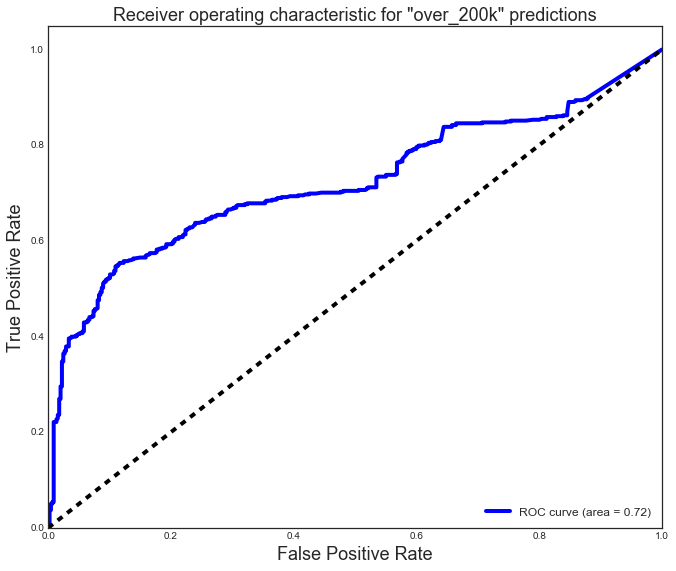

In [50]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

# [insert explanation of this section -- what is this for?  Where do we use this later?]
# getting various confidence scores for each individual point
# this is the distance from the overall general mean
Y_score = logmodel.decision_function(X)

# [insert explanation of this section -- why do we use these?]

# looking at false positives and true positives so we can calculate 
# accuracy, recall, and precision 
FPR = dict()
TPR = dict()
ROC_AUC = dict()

# [insert explanation of this section]
#using the roc_curve function from the standard metrics library
#then storing them in two separate variables
# AUC - is the area underneath the curve (like an integral)
# tells you how "right" the results are 
# the [1] index is getting only the FPR and TPR values, not the
# indicies, which would be [0]
FPR[1], TPR[1], _ = roc_curve(y, y_hat_prob[:, 1])
ROC_AUC[1] = auc(FPR[1], TPR[1])

# [insert explanation of this section -- what is being plotted?  Which elements are data driven?  Which elements are purely visual?]


# plotting the data the False Postive ratio vs the true positive ratio hence the 
# FPR vs. the TPR, then adding the label

plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)

# plotting the diagonal line representing the baseline which would be 
# either the mean guess, or the rough standard guess
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

# setting up the scales on the graphs along with the labels for the graph
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for "over_200k" predictions', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 6. Turn the previous block of code into a function

Learning to make your code modular and reusable will save you TONS of time in the future.  Also, learning to document your code properly will save you time re-learning your code, and will help other other learn your code faster.

Using the previous code block, create a function that takes the following parameters:

- Trained / fitted logistic regression model object
- Dataframe / matrix, X
- True values of your target, y
- Predicted probabilities

Try to use named parameters (keyword parameters) for your function so the order in which you specify your parameters will not matter (ie: classifier=lr, data=X, target=y, predict_proba=probabilities).

If you need a refresher, check out this [handy review](http://www.tutorialspoint.com/python/python_functions.htm).

In [64]:
def PREV_BLOCK(logmodel, X, y, y_hat_prob):
    # [insert explanation of this section -- what is this for?  Where do we use this later?]
    # getting various confidence scores for each individual point
    # this is the distance from the overall general mean
    Y_score = logmodel.decision_function(X)

    # [insert explanation of this section -- why do we use these?]

    # looking at false positives and true positives so we can calculate 
    # accuracy, recall, and precision 
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # [insert explanation of this section]
    #using the roc_curve function from the standard metrics library
    #then storing them in two separate variables
    # AUC - is the area underneath the curve (like an integral)
    # tells you how "right" the results are 
    # the [1] index is getting only the FPR and TPR values, not the
    # indicies, which would be [0]
    FPR[1], TPR[1], _ = roc_curve(y, y_hat_prob[:, 1])
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # [insert explanation of this section -- what is being plotted?  Which elements are data driven?  Which elements are purely visual?]


    # plotting the data the False Postive ratio vs the true positive ratio hence the 
    # FPR vs. the TPR, then adding the label

    plt.figure(figsize=[11,9])
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)

    # plotting the diagonal line representing the baseline which would be 
    # either the mean guess, or the rough standard guess
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

    # setting up the scales on the graphs along with the labels for the graph
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic for "over_200k" predictions', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

## 7.  Adjust the threshold of your target to +/- 200k

Does the ROC change at all?

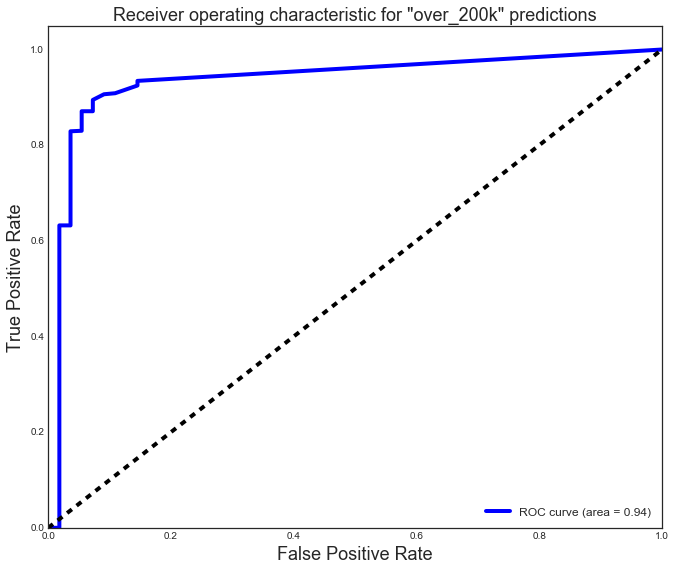

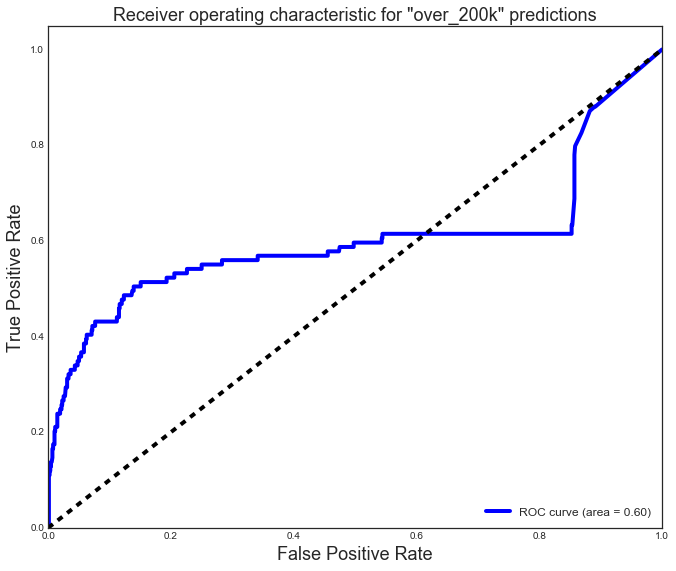

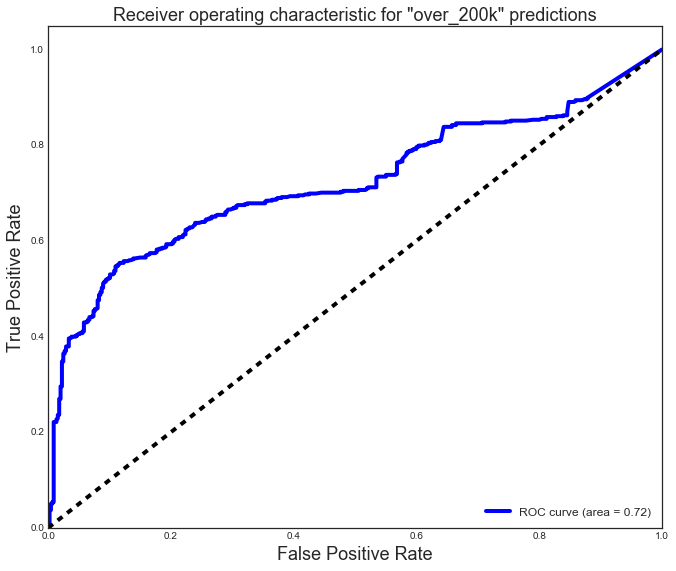

In [93]:




df['over_100'] = df.price.map(lambda x: 1 if x >50000 else 0)
df['over_100'] = df.price.map(lambda x: 1 if x >50000 else 0)
subset = df[['beds', 'baths','sq__ft','over_100']]

formula = 'over_100 ~ beds + baths + sq__ft -1'
y, X = patsy.dmatrices(formula, subset)

y = np.ravel(y)

logres = LogisticRegressionCV(cv=5, random_state=42)
logmodel = logres.fit(X,y)
y_hat = logmodel.predict(X)
y_hat_prob = logmodel.predict_proba(X)

PREV_BLOCK(logmodel,X,y,y_hat_prob)


df['over_150'] = df.price.map(lambda x: 1 if x >400000 else 0)
df['over_150'] = df.price.map(lambda x: 1 if x >400000 else 0)
subset = df[['beds', 'baths','sq__ft','over_150']]

formula = 'over_150 ~ beds + baths + sq__ft -1'
y, X = patsy.dmatrices(formula, subset)

y = np.ravel(y)

logres = LogisticRegressionCV(cv=5, random_state=42)
logmodel = logres.fit(X,y)
y_hat = logmodel.predict(X)
y_hat_prob = logmodel.predict_proba(X)

PREV_BLOCK(logmodel,X,y,y_hat_prob)



df['over_200'] = df.price.map(lambda x: 1 if x >200000 else 0)
df['over_200'] = df.price.map(lambda x: 1 if x >200000 else 0)
subset = df[['beds', 'baths','sq__ft','over_200']]

formula = 'over_200 ~ beds + baths + sq__ft -1'
y, X = patsy.dmatrices(formula, subset)

y = np.ravel(y)

logres = LogisticRegressionCV(cv=5, random_state=42)
logmodel = logres.fit(X,y)
y_hat = logmodel.predict(X)
y_hat_prob = logmodel.predict_proba(X)

PREV_BLOCK(logmodel,X,y,y_hat_prob)




### 8. Create a few new variables, based on your predicted classes.

Create these variables with the cooresponding probabilities from class 1

- **adj_target_10** - class 1 > .1
- **adj_target_30** - class 1 > .3
- **adj_target_65** - class 1 > .65
- **adj_target_80** - class 1 > .8
- **adj_target_95** - class 1 > .95


          0         1
0  0.585812  0.414188
1  0.580520  0.419480
2  0.590334  0.409666
3  0.583999  0.416001
4  0.590221  0.409779
          0         1  adj_target_10  adj_target_30  adj_target_65  \
0  0.585812  0.414188              1            1.0       0.414188   
1  0.580520  0.419480              1            1.0       0.419480   
2  0.590334  0.409666              1            1.0       0.409666   
3  0.583999  0.416001              1            1.0       0.416001   
4  0.590221  0.409779              1            1.0       0.409779   

   adj_target_80  adj_target_90  
0       0.414188       0.414188  
1       0.419480       0.419480  
2       0.409666       0.409666  
3       0.416001       0.416001  
4       0.409779       0.409779  


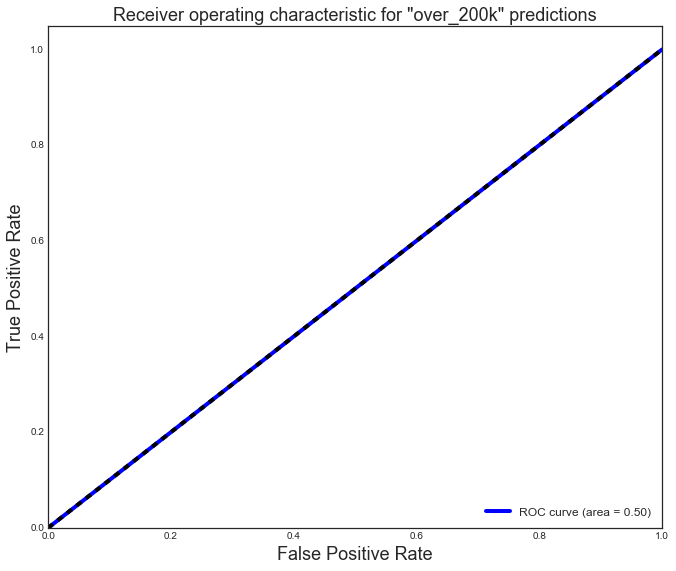

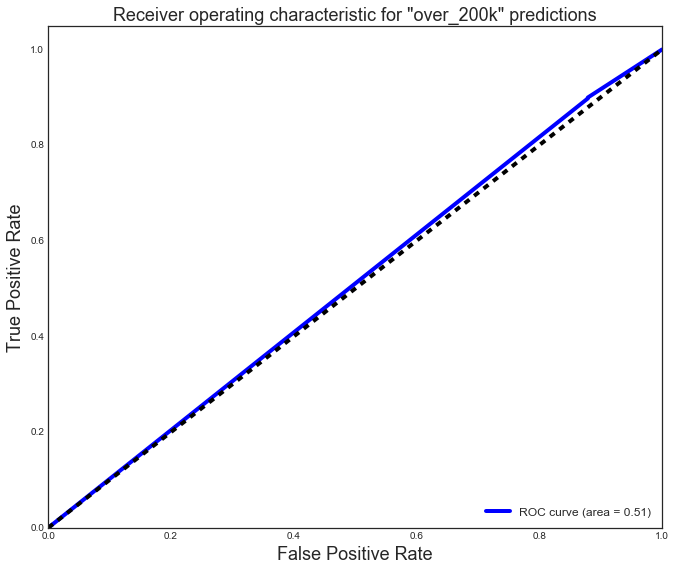

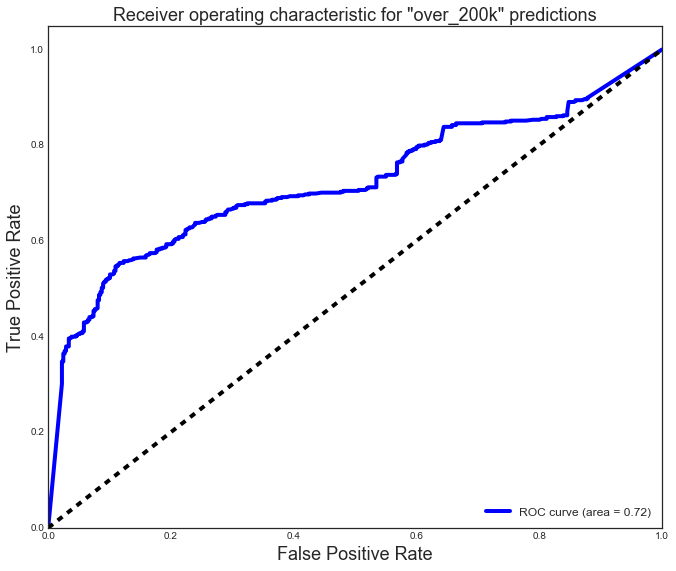

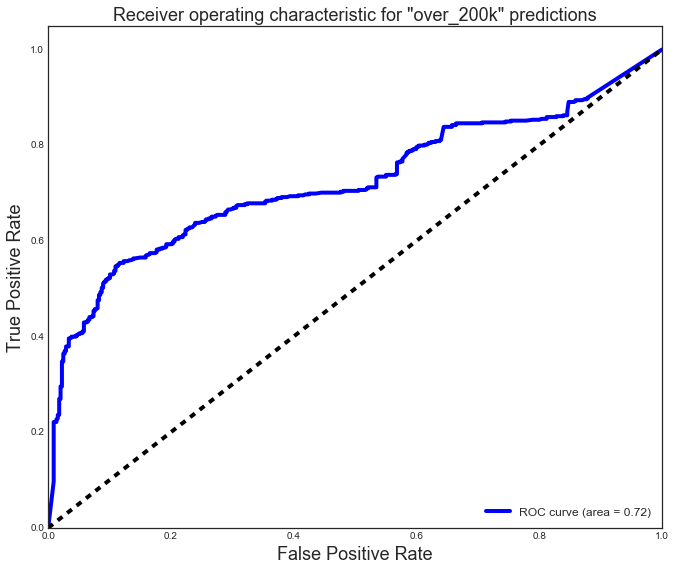

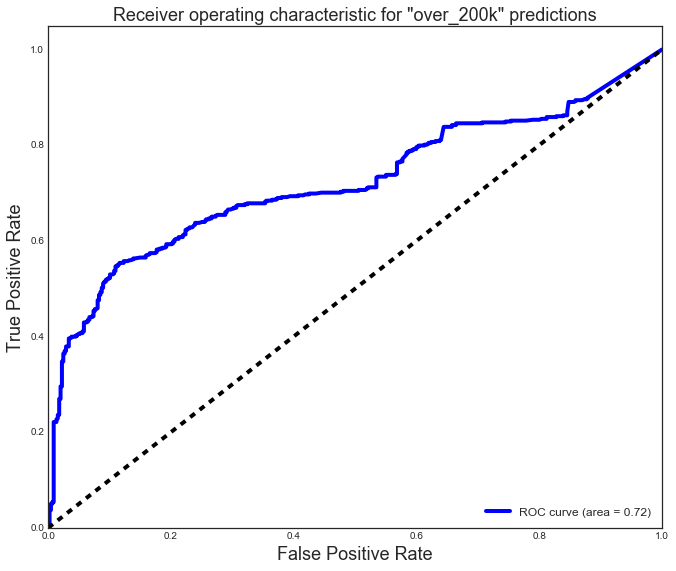

In [96]:
y_hatz = None
y_hatz = pd.DataFrame(y_hat_prob)
print y_hatz.head()
y_hatz['adj_target_10'] = y_hatz[1].map(lambda x: 1 if x > .1 else x)
y_hatz['adj_target_30'] = y_hatz[1].map(lambda x: 1 if x > .3 else x)
y_hatz['adj_target_65'] = y_hatz[1].map(lambda x: 1 if x > .65 else x)
y_hatz['adj_target_80'] = y_hatz[1].map(lambda x: 1 if x > .8 else x)
y_hatz['adj_target_90'] = y_hatz[1].map(lambda x: 1 if x > .95 else x)


temp = y_hatz.iloc[:,[0,2]]
array = np.array(temp)
PREV_BLOCK(logmodel,X,y,array)

temp = y_hatz.iloc[:,[0,3]]
array = np.array(temp)
PREV_BLOCK(logmodel,X,y,array)

temp = y_hatz.iloc[:,[0,4]]
array = np.array(temp)
PREV_BLOCK(logmodel,X,y,array)

temp = y_hatz.iloc[:,[0,5]]
array = np.array(temp)
PREV_BLOCK(logmodel,X,y,array)

temp = y_hatz.iloc[:,[0,6]]
array = np.array(temp)
PREV_BLOCK(logmodel,X,y,array)




### 9. Plot the ROC for these new true targets, adj_target*

How do they change?

## Challenge #1

Plot the range ROC of all adj_target* variables on a single plot.

## Challenge #2

Load the abalone dataset, and try a logistic regression using the previous codebase.  Plot the ROC on the dataset.

Standardize your predictors.  How does this impact your accuracy and ROC?

## Challenge #3
Check out the multiroc class and try to get it to work with the setosa dataset (sklearn.datasets import load_iris).  Check the sklearn docs for ROC_CURVE examples for plotting multinomial responses.